In [2]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sea

In [3]:
url = "https://covid-193.p.rapidapi.com/statistics"
headers = {"x-rapidapi-key": "8fe966f01bmsh2efd26b5b268419p159326jsnf8fa7985f3a6","x-rapidapi-host": "covid-193.p.rapidapi.com"}
response = requests.get(url, headers=headers)
res = response.json()

In [27]:
import pprint
val = res['response']
pprint.pprint( val[0] )

{'cases': {'1M_pop': '354211',
           'active': 2164,
           'critical': None,
           'new': None,
           'recovered': 2,
           'total': 2166},
 'continent': 'Africa',
 'country': 'Saint-Helena',
 'day': '2025-06-02',
 'deaths': {'1M_pop': None, 'new': None, 'total': None},
 'population': 6115,
 'tests': {'1M_pop': None, 'total': None},
 'time': '2025-06-02T09:00:09+00:00'}


In [32]:
val = res['response']

data = { 'Country': [], 'Continent': [], 'Population': [], 'Total_Cases': [], 'Active_Cases': [], 'Recovered': [], 'Deaths': [], 
        'Tests_Total': [], 'Tests_per_Million': []}

for i in val:
    try:
        data['Country'].append(i.get('country'))
        data['Continent'].append(i.get('continent'))
        data['Population'].append(i.get('population'))
        data['Total_Cases'].append(i['tests'].get('total'))
        data['Active_Cases'].append(i['cases'].get('active'))
        data['Recovered'].append(i['cases'].get('recovered'))
        data['Deaths'].append(i['deaths'].get('total'))

        total_tests = i['tests'].get('total')
        tests_per_million = i['tests'].get('1M_pop')

        if total_tests is not None:
            total_tests = int(str(total_tests).replace(',', ''))
        if tests_per_million is not None:
            tests_per_million = int(str(tests_per_million).replace(',', ''))

        data['Tests_Total'].append(total_tests)
        data['Tests_per_Million'].append(tests_per_million)

    except Exception:
        continue  
df = pd.DataFrame(data)

# Top 10 Countries by COVID-19 Lowest Tests per Million

<Axes: title={'center': 'Top 10 Countries by COVID-19 Lowest Tests per Million'}, xlabel='Tests_per_Million', ylabel='Country'>

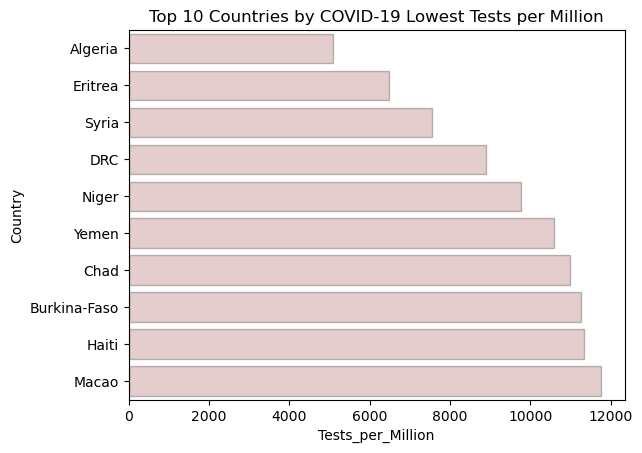

In [39]:
df_temp = df.dropna(subset=['Tests_per_Million'])
df_lowest = df_temp.sort_values(by='Tests_per_Million').head(10)

plt.title('Top 10 Countries by COVID-19 Lowest Tests per Million')
sns.barplot(  data=df_lowest,  y='Country',  x='Tests_per_Million',  color='brown',  alpha=0.25,  edgecolor='black')

# Top 10 Countries by COVID-19 Cases per Million

<Axes: title={'center': 'Top 10 Countries by COVID-19 Cases per Million'}, xlabel='Tests_per_Million', ylabel='Country'>

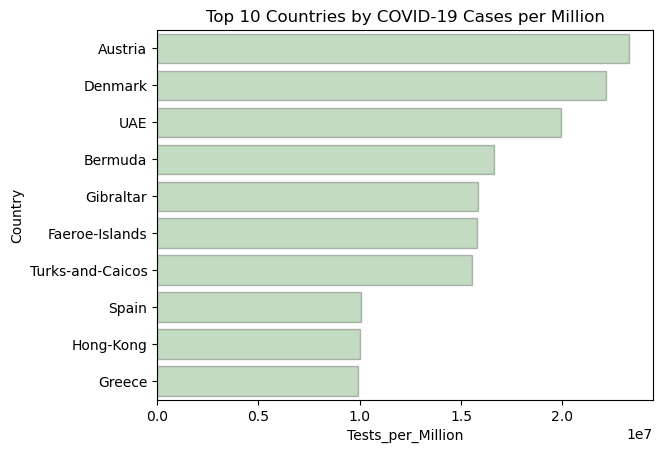

In [38]:
df_temp =  df.dropna( subset=['Tests_per_Million'])
mask = df_temp['Country'] != 'All'
df_temp = df_temp[mask]
df_lowest = df_temp.sort_values(by='Tests_per_Million', ascending= False).head(10)

plt.title('Top 10 Countries by COVID-19 Cases per Million')
sea.barplot(data=df_lowest, y='Country', x='Tests_per_Million', color='green', alpha=0.25, edgecolor='black')